## Default Arguments, Variable-length Arguments and Scope

### Crash course on scope in functions
- Not all objects are accessible everywhere in a script
- Scope: part of the program where an object or name may be accessible
    - **Global scope**: defined in the main body of a script
    - **Local scope**: defined inside a function
        - Once the execution of a function is done, any name inside the local scope ceases to exist ➡︎ cannot access those names anymore outside of the function definition.
    - **Built-in scope**: names in the pre-defined built-ins module
        - ex) print(), sum()
        
#### Global vs. local scope

In [1]:
def square(value):
    """Returns the square of a number."""
    
    new_val = value ** 2
    
    return new_val

In [2]:
square(4)

16

In [3]:
new_val

NameError: name 'new_val' is not defined

'new_val' was defined only within the **local scope** of the function.
  
  ➡︎ 'new_val' was not defined **globally.**

In [4]:
new_val = 5

In [5]:
def square(value):
    ''' Returns the square of a number. '''
    new_val = value ** 2
    
    return new_val

In [6]:
square(3)

9

When you call the name in the **global scope**, it will access the name in the global.

In [7]:
new_val

5

When you call the name in the **local scope** of the function, it will look first in the local scope.
  
If Python cannot find the name in the local scope, it will then and only then look in the global scope.

In [8]:
new_val = 7

def square(value):
    ''' Returns the square of a number. '''
    new_value2 = new_val ** 2
    
    return new_value2

In [9]:
square(3)

49

- Access 'new_val' defined globally within the function square.
- the global value accessed is the value at the time the **function is called**, not the value when the **function is defined**.

In [10]:
new_val = 15
square(3)

225

- If we re-assign **new_val** and call the function square, we see that the **new value of new_val is accessed**.

When we reference a name, first the **local scope** is searched, then the **global**. If the name is in neither, then the **built-in scope** is searched.

In [11]:
new_val = 10

def square(value):
    ''' Returns the square of a number. '''
    
    global new_val
    new_val = new_val ** 2
    
    return new_val

In [12]:
square(3)

100

In [13]:
new_val

100

In [14]:
square(3)

10000

- The global value has indeed been squared by running the function square.

In [15]:
# Create a string: team
team = "teen titans"

# Define change_team()
def change_team():
    """Change the value of the global variable team."""

    # Use team in global scope
    global team

    # Change the value of team in global: team
    team = "justice league"
    
# Print team
print(team)

teen titans


In [16]:
# Call change_team()
change_team()

In [17]:
# Print team
print(team)

justice league


### Nested functions

In [ ]:
def outer(variable1):
    ''' explanation'''
    x = ...
    
    def inner(variable2):
        ''' explanation '''
        y = x ** 2
    
    return ...

Python searches the local scope of the function inner, then if it doesn't find x, it searches the scope of the function outer, which is called an **enclosing function**.

If Python can't find x in the scope of the enclosing function, it only then searches the global scope and then the built-in scope.

**Define an inner function** within our function definition, and call it where necessary ➡︎ **Nested function**
- The syntax for the inner function is exactly the same as that for any other function.

#### Why use nested function?
1) Readability

- The reason why we use functions: **Repetition**
    <br>  If there's a **repetitive code**, take it out as a **function** and call it.
- Nested function
<br> If any of the codes in a function have **repeated codes**, they can be declared as **nested functions** to effectively manage the code of the parent function and increase readability.

In [18]:
def print_all_elements(list_of_things):
    # Declare nested function
    
    def print_each_element(things):
        for thing in things:
            print(thing)
            
    if len(list_of_things) > 0:
        print_each_element(list_of_things)
    
    else:
        print('There is nothing!')

In [19]:
print_all_elements([1, 2, 3, 4])

1
2
3
4


2) Closure
- The parent function returns the nested function.
<br>This allows for operations using variables from isolated parent functions through nested functions while isolating variables from the outside.
- Use it when you want to **restrict access** so that it cannot be **exposed or modified**.

---
**Summary**
1. Nested functions use variables or information from parent functions within nested functions.
2. The parent function returns the nested function as a return value.
3. Since it is returned from a parent function, variables in the parent function are not directly accessible but can be used through the nested function returned by the parent function.

In [20]:
def calculate_power(number, power):
    return number ** power

calculate_power(2, 7)

128

In [22]:
def generate_power(base_number):
    def nth_power(power):
        return base_number ** power

    return nth_power

calculate_power_of_two = generate_power(2)

In [23]:
print(calculate_power_of_two(7))

128


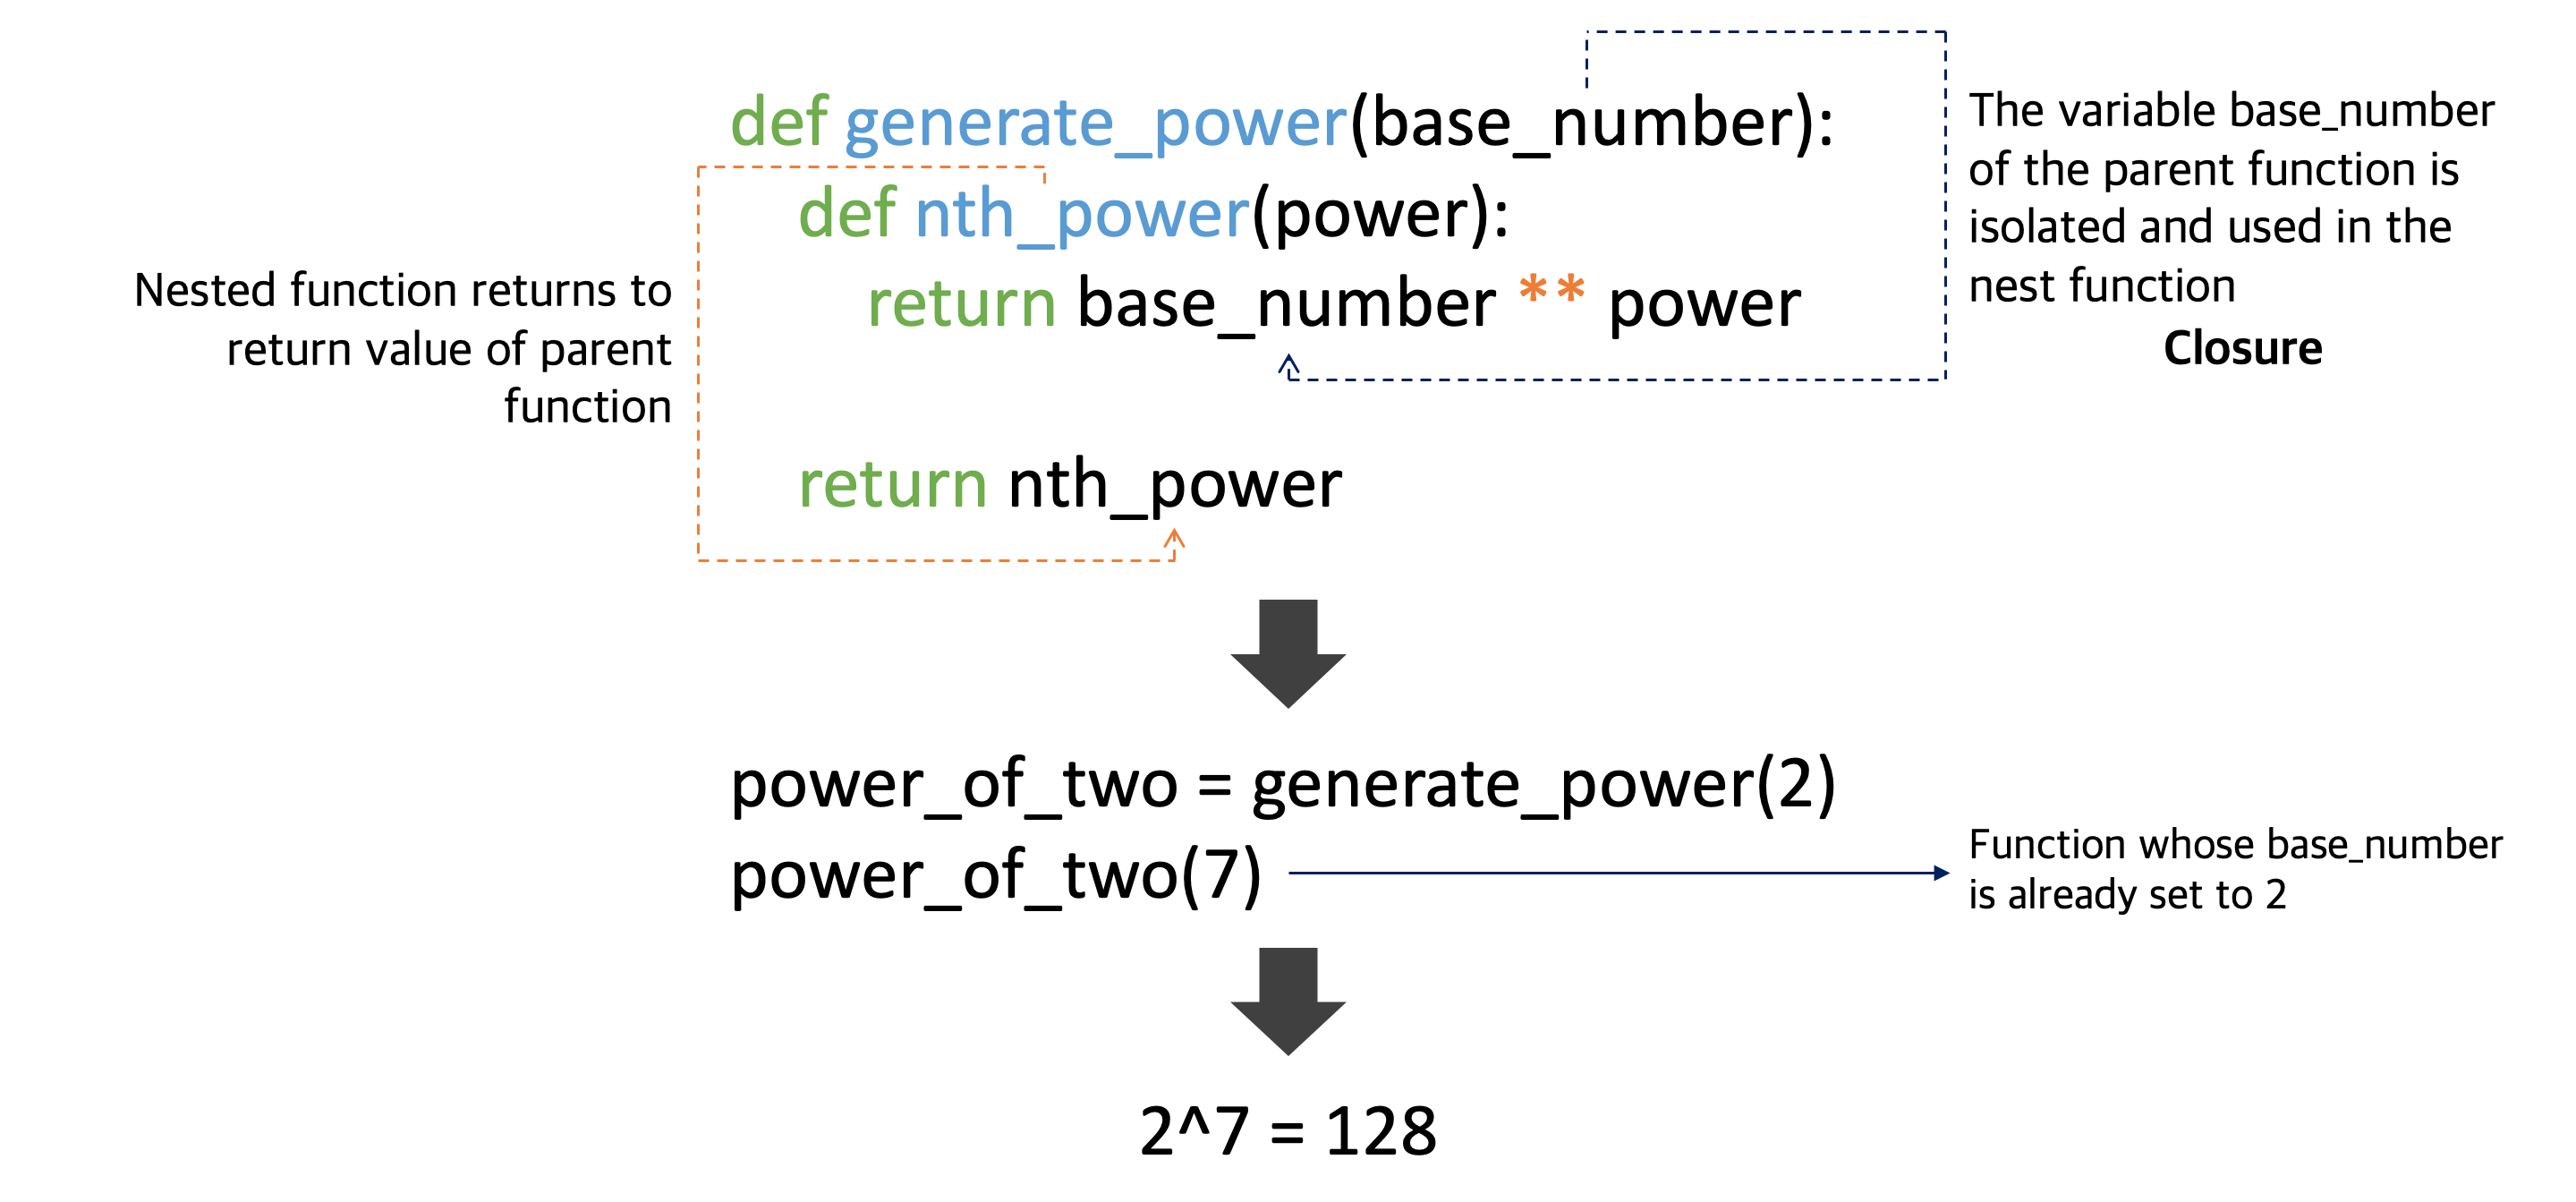

In [28]:
from IPython.display import Image

Image('/Users/yoonjeonghyeon/Desktop/python/KUBIG/Python Study/nested_function.png')

### Default and Flexible Arguments
#### Add a default argument

In [31]:
def power(number, pow = 1):
    ''' Raise number to the power of pow.'''
    new_value = number ** pow
    
    return new_value

This function raises the first argument to the power of the second argument.
<br>The default 2nd argument value is **1**.

In [32]:
power(9, 2)

81

We can call the function **with two arguments**

In [33]:
power(9)

9

If we only use **one argument**, the function call will use the **default argument of 1** for the second parameter.

---
#### Flexible Argument: *args
Write a function but not sure how many arguments a user will want to pass it

In [34]:
def add_all(*args):
    ''' Sum all values in *args together. '''
    
    sum_all = 0 # Initialize sum
    
    for num in args: # Accumulate the sum
        sum_all += num
        
    return sum_all

In [35]:
add_all(3)

3

In [36]:
add_all(20,21,2,1)

44

In [37]:
add_all(3.5, 4.3, 2.2)

10.0

#### Flexible Arguments: **kwargs

In [38]:
def print_kwargs(**kwargs):
    print(kwargs)

In [39]:
print_kwargs(a=1)
print_kwargs(name = 'wideyoon', age = 26)

{'a': 1}
{'name': 'wideyoon', 'age': 26}


- The values are output to the **dictionary**.

args: Used to send **non-keyworded parameters** to a function.
<br>kwargs: Used to send **keyworded parameters** to a function.